In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.preprocessing import label_binarize, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin

In [3]:
def plot_feature(X, y):
    plt.scatter(X, y)
    plt.show()


def plot_dataset(X, y):
    for k in set(y):        
        plt.plot(X[:, 0][y == k], X[:, 1][y == k], "o", alpha=0.3)
    plt.legend(set(y), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


def plot_vetor(vetor, color="k"):
    origem = [0, 0]
    plt.arrow(*origem, *vetor, color=color)
    plt.show()


def plot_hiperplano(vetor, bias=0, xmin=0, xmax=1):
    xs = np.linspace(xmin, xmax, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - bias / vetor[1]
    plt.plot(xs,ys)


def perpendicular(hiperplano):
    perp = np.array(hiperplano[::-1])
    perp[0] *= -1

    return perp


def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def plotahiperplano(vetor, bias=0, xmin=0, xmax=1):
    xs = np.linspace(xmin, xmax, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - bias / vetor[1]
    plt.plot(xs,ys)

In [4]:
def step_func(y):
    return (y >= 0)*2 - 1


def accuracy(y, y_pred, verbose=False):
    accuracy = sum(y_pred == y) / len(y)
    if verbose == True:
        print(f"Accuracy={accuracy}")

    return accuracy

In [45]:
class CostPerceptron():
    @staticmethod
    def error(y, y_pred):
        return y - y_pred
    @staticmethod
    def cost(y, y_pred):
        return np.sum(CostPerceptron.error(y, y_pred)**2)
    @staticmethod
    def gradient(y, y_pred, X):
        return np.matmul(X.T, CostPerceptron.error(y, y_pred))


class HingeLoss():
    @staticmethod
    def error(y, y_pred):
        return np.multiply(y, y_pred)
    @staticmethod
    def cost(y, y_pred):
        return np.sum(1 - HingeLoss.error(y, y_pred))
    @staticmethod
    def gradient(y, y_pred, X):
        marginals = HingeLoss.error(y, y_pred) < 1
        return np.matmul(y[marginals], X[marginals])


class Adaline():
    def __init__(self):
        self.pre_activated = True

    @staticmethod
    def error(y, y_pred):
        return y - y_pred
    @staticmethod
    def cost(y, y_pred):
        return np.sum((1 - Adaline.error(y, y_pred))**2)
    @staticmethod
    def gradient(y, y_pred, X):
        return np.matmul(Adaline.error(y, y_pred).T, X)

In [61]:
class Perceptron(BaseEstimator, ClassifierMixin):

    def __init__(self, custo=CostPerceptron(), alpha=0.001, epochs=200, threshold=1):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = alpha
        self.epochs = epochs
        self.custo = custo
        self.threshold = threshold
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.labels = list(set(y))
        if len(self.labels) > 2:
            y = label_binarize(y, classes=self.labels)*2-1
            self.w = np.random.uniform(-1, 1, size=(Xb.shape[1], y.shape[1]))
        else:
            self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.epochs):
            a = self.preactivate(X)
            ypred = self.activation(a)
            custo = self.custo.cost(y, ypred)
            if custo == 0:
                break
            self.w = self.w + self.alpha*self.custo.gradient(y, ypred, Xb)
    
    def preactivate(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        if len(self.w.shape) > 1:
            idx = np.argmax(a, axis=1)
        else:            
            idx = np.array(self.activation(a) > self.threshold, dtype=int)[:]
            if len(idx.shape) > 1:
                idx = idx[:,0]            

        ypred = np.array([self.labels[i] for i in idx])
        return ypred




fish

shape=(159, 7)
   Weight   Length1   Length2   Length3    Height     Width
0    0.46  0.408696  0.489130  0.487805  0.705882  0.430464
1    0.53  0.443478  0.521739  0.528455  0.771242  0.496689
2    0.57  0.434783  0.532609  0.520325  0.745098  0.582781
3    0.59  0.504348  0.597826  0.544715  0.803922  0.529801
4    0.61  0.513043  0.597826  0.552846  0.764706  0.668874


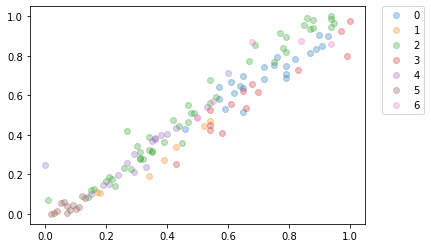

Accuracy perceptron_criterion=0.90625
epochs=10000, alpha=0.01, threshold=0
(7, 7)


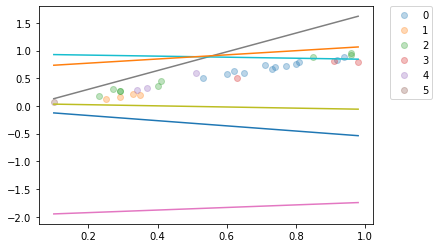

Accuracy adaline=0.03125
epochs=10000, alpha=0.01, threshold=0
(7, 7)


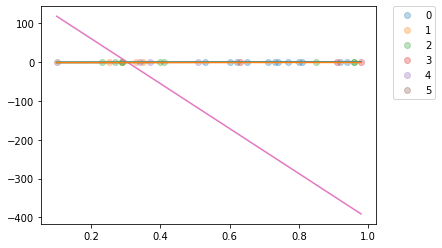



mushrooms

shape=(8124, 23)
   cap-shape  cap-surface  cap-color  bruises   odor  gill-attachment  \
0        1.0     0.666667   0.444444      1.0  0.750              1.0   
1        1.0     0.666667   1.000000      1.0  0.000              1.0   
2        0.0     0.666667   0.888889      1.0  0.375              1.0   
3        1.0     1.000000   0.888889      1.0  0.750              1.0   
4        1.0     0.666667   0.333333      0.0  0.625              1.0   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0           0.0        1.0    0.363636          0.0  ...   
1           0.0        0.0    0.363636          0.0  ...   
2           0.0        0.0    0.454545          0.0  ...   
3           0.0        1.0    0.454545          0.0  ...   
4           1.0        0.0    0.363636          1.0  ...   

   stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  \
0                  0.666667                  0.666667                   0.875   
1       

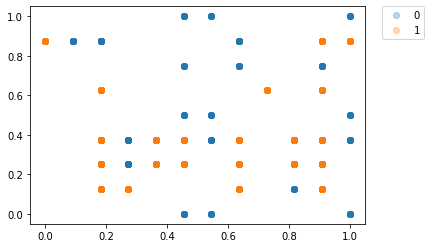

Accuracy perceptron_criterion=0.9618461538461538
epochs=5000, alpha=0.01, threshold=0
(22,)


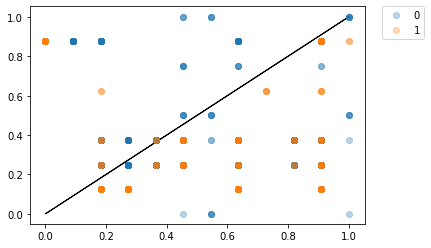

Accuracy adaline=0.9513846153846154
epochs=5000, alpha=0.01, threshold=0
(22,)


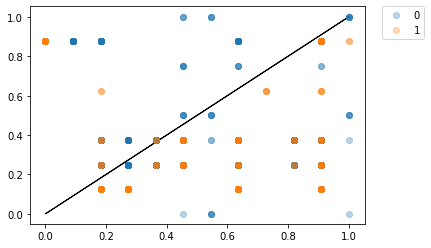

In [63]:
cfs_str = [
           "perceptron_criterion", 
           "adaline"
           ]
cfs = [CostPerceptron(), Adaline()]

models = [

    { 'case': 'fish', 'path': '../resources/fish/dataset.csv', 
      'X_cols': ['Weight', 'Width'], 'y_col': 'Species', 'cols_remove': [], 
      'X_train': None, 'y_train': None, 'X_test': None, 'y_test': None,
      'epochs': 10000, 'alpha': 1e-2, 'threshold': 0, 'is_binary': False },

    { 'case': 'mushrooms', 'path': '../resources/mushrooms/dataset.csv', 
      'X_cols': ['gill-color', 'spore-print-color'], 'y_col': 'class', 'cols_remove': ['veil-type'],
      'X_train': None, 'y_train': None, 'X_test': None, 'y_test': None,
      'epochs': 5000, 'alpha': 1e-2, 'threshold': 0, 'is_binary': True }

]

datasets = []
for model in models:
    print(f'\n\n{model["case"]}\n')
    dataset = pd.read_csv(model["path"])
    datasets.append(dataset)

    print(f'shape={dataset.shape}')
    #print(dataset.head())
    #print(dataset.info())

    if len(model['cols_remove']) > 0:
      dataset = dataset.drop(model['cols_remove'], axis=1)

    X = dataset.drop(model["y_col"], axis=1)
    y = dataset[model["y_col"]]

    labelencoder=LabelEncoder()
    normalizer = MinMaxScaler()
    for column in X.columns:
      X[column] = labelencoder.fit_transform(X[column])
      X[column] = normalizer.fit_transform(X[column].values.reshape(-1,1))

    print(X.head(5))
    
    if y.dtype == 'object':
      y = LabelEncoder().fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # for i in range(0, len(X_train.columns)-1):
    #   for j in range(1, len(X_train.columns)):
    #     if j<=i:
    #       continue

    #     print(f'i={X_train.columns[i]} x j={X_train.columns[j]}')      
    #     plot_dataset(X_train.iloc[:,i:j+1:j-i].values, y_train)
    #     plt.show()


    plot_dataset(X_train.loc[:, model["X_cols"]].values, y_train)
    plt.show()    

    for cf_str, cost_function in zip(cfs_str, cfs):

      perceptron = Perceptron(custo=cost_function, epochs=model['epochs'], alpha=model['alpha'], threshold=model['threshold'])
      perceptron.fit(X_train, y_train)
      ypred = perceptron.predict(X_test)
      accuracy = sum(y_test == ypred)/len(y_test)
      print(f'Accuracy {cf_str}={accuracy}')
      print(f'epochs={model["epochs"]}, alpha={model["alpha"]}, threshold={model["threshold"]}')
      print(perceptron.w.shape)      

      plot_dataset(X_test.loc[:,model['X_cols']].values, y_test)
      
      if model['is_binary'] == True:
        plot_vetor(perpendicular([1,-1]))
      else:
        for i in range(len(set(y_test))):
          plot_hiperplano(perceptron.w[1:,i], perceptron.w[0,i], min(X_test.loc[:,model['X_cols'][0]]), max(X_test.loc[:,model['X_cols'][0]]))

      plt.show()